In [46]:
import numpy as np 
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

In [47]:
# Initializing constants and initial conditions:
tau = 0
kappa = 0
i0 = 0.01
s0 = 0.99
r0 = 0
x0 = [s0, i0, r0]

In [48]:
# SIR Model
def ode(x, y):
  S, I, R = y
  Ds = -tau*S*I
  Di = -I/kappa + tau*I*S
  Dr = I/kappa
  return [Ds, Di, Dr]

In [49]:
# Event to determine the "stopping time"
def event(x, y):
  result = ode(x, y)
  return result[2] - 0.0001
event.terminal=True

In [50]:
# Event to determine the peak of the infected curve
def peakInfected(x, y):
  result = ode(x, y)
  return result[1]

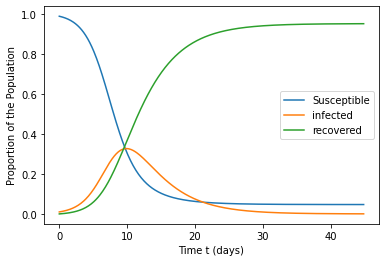

Stopping time: 44.87
Peak infected: 9.90 days, wtih proportion of population: 0.33


In [51]:
# SIR First simulation
tau = 0.8
kappa = 4

sol1 = solve_ivp(ode, (0,100), (0.99, 0.01, 0), method='RK45',max_step=0.1, events=[event, peakInfected])

plt.plot(sol1.t, sol1.y[0].T, label='Susceptible')
plt.plot(sol1.t, sol1.y[1].T, label='infected')
plt.plot(sol1.t, sol1.y[2].T, label='recovered')
plt.xlabel('Time t (days)')
plt.ylabel('Proportion of the Population')
plt.legend()
plt.show()

stop = sol1.t_events[0]
peak = sol1.t_events[1]
yPeak = sol1.y_events[1][0][1]

print('Stopping time: ' + '{:.2f}'.format(float(stop)))
print('Peak infected: ' + '{:.2f}'.format(float(peak)) + ' days, wtih proportion of population: ' + '{:.2f}'.format(float(yPeak)))


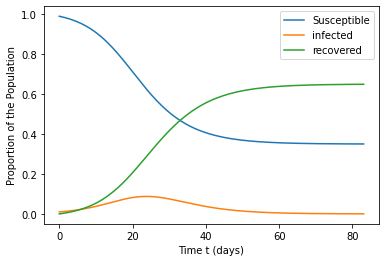

Stopping time: 83.08
Peak infected: 23.79 days, wtih proportion of population: 0.09


In [52]:
# Second simulation
tau = 0.4
kappa = 4

sol2 = solve_ivp(ode, (0,100), (0.99, 0.01, 0), method='RK45',max_step=0.1, events=[event, peakInfected])

plt.plot(sol2.t, sol2.y[0].T, label='Susceptible')
plt.plot(sol2.t, sol2.y[1].T, label='infected')
plt.plot(sol2.t, sol2.y[2].T, label='recovered')
plt.xlabel('Time t (days)')
plt.ylabel('Proportion of the Population')
plt.legend()
plt.show()

stop = sol2.t_events[0]
peak = sol2.t_events[1]
yPeak = sol2.y_events[1][0][1]

print('Stopping time: ' + '{:.2f}'.format(float(stop)))
print('Peak infected: ' + '{:.2f}'.format(float(peak)) + ' days, wtih proportion of population: ' + '{:.2f}'.format(float(yPeak)))

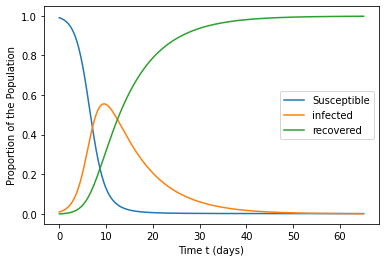

Stopping time: 65.06
Peak infected: 9.56 days, wtih proportion of population: 0.56


In [77]:
# SIR Third Simulation
tau = 0.8
kappa = 8

sol3 = solve_ivp(ode, (0,200), (0.99, 0.01, 0), method='RK45',max_step=0.1, events=[event, peakInfected])

plt.plot(sol3.t, sol3.y[0].T, label='Susceptible')
plt.plot(sol3.t, sol3.y[1].T, label='infected')
plt.plot(sol3.t, sol3.y[2].T, label='recovered')
plt.xlabel('Time t (days)')
plt.ylabel('Proportion of the Population')
plt.legend()
plt.show()

stop = sol3.t_events[0]
peak = sol3.t_events[1]
yPeak = sol3.y_events[1][0][1]

print('Stopping time: ' + '{:.2f}'.format(float(stop)))
print('Peak infected: ' + '{:.2f}'.format(float(peak)) + ' days, wtih proportion of population: ' + '{:.2f}'.format(float(yPeak)))

 float(sol2.t_events[1])
 float(sol3.t_events[1])
 float(sol2.y_events[1][0][1])
 float(sol3.y_events[1][0][1])

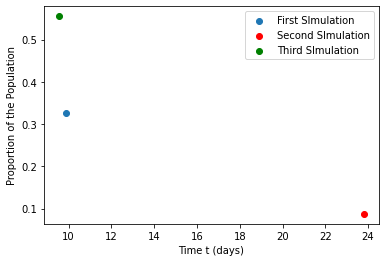

In [54]:
plt.scatter((float(sol1.t_events[1])), (float(sol1.y_events[1][0][1])), label='First SImulation')
plt.scatter((float(sol2.t_events[1])), (float(sol2.y_events[1][0][1])), label='Second SImulation', color='r')
plt.scatter((float(sol3.t_events[1])), (float(sol3.y_events[1][0][1])), label='Third SImulation', color='g')
plt.xlabel('Time t (days)')
plt.ylabel('Proportion of the Population')
plt.legend()
plt.show()

In [86]:
nu = 0.3
def odeVac(x, y):
  S, I, R, V = y
  Ds = -tau*S*I - (nu*S*I)/(I+S)
  Di = -I/kappa + tau*I*S
  Dr = I/kappa
  Dv = (nu*S*I)/(I+S)
  return [Ds, Di, Dr, Dv]


In [56]:
def eventVac(x, y):
  result = odeVac(x, y)
  return result[2] - 0.0001
eventVac.terminal=True

def peakInfectedVac(x, y):
  result = odeVac(x, y)
  return result[1]

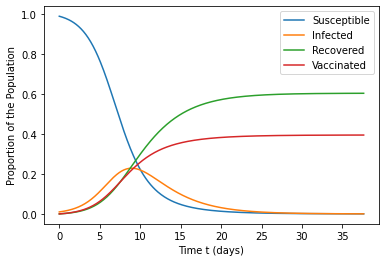

Stopping time: 37.63
Peak infected: 8.94 days, wtih proportion of population: 0.23


In [87]:
# SIRV Simulation 1

# Update the constants
tau = 0.8
kappa = 4

sol = solve_ivp(odeVac, (0,100), (0.99, 0.01, 0, 0), method='RK45',max_step=0.1, events=[eventVac, peakInfectedVac]) 
plt.plot(sol.t, sol.y[0].T, label='Susceptible')
plt.plot(sol.t, sol.y[1].T, label='Infected')
plt.plot(sol.t, sol.y[2].T, label='Recovered')
plt.plot(sol.t, sol.y[3].T, label='Vaccinated')
plt.xlabel('Time t (days)')
plt.ylabel('Proportion of the Population')
plt.legend()
plt.show()

stop = sol.t_events[0]
peak = sol.t_events[1]
yPeak = sol.y_events[1][0][1]

print('Stopping time: ' + '{:.2f}'.format(float(stop)))
print('Peak infected: ' + '{:.2f}'.format(float(peak)) + ' days, wtih proportion of population: ' + '{:.2f}'.format(float(yPeak)))

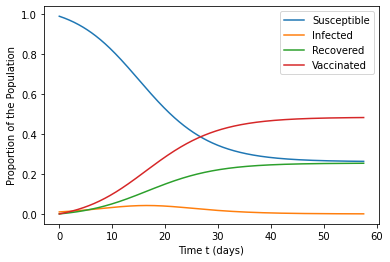

Stopping time: 57.56
Peak infected: 16.57 days,  wtih proportion of population: 0.04


In [58]:
# SIRV Simulation 2

# Update constants
tau = 0.4
kappa = 4

sol1 = solve_ivp(odeVac, (0,100), (0.99, 0.01, 0, 0), method='RK45',max_step=0.1, events=[eventVac, peakInfectedVac]) 
plt.plot(sol1.t, sol1.y[0].T, label='Susceptible')
plt.plot(sol1.t, sol1.y[1].T, label='Infected')
plt.plot(sol1.t, sol1.y[2].T, label='Recovered')
plt.plot(sol1.t, sol1.y[3].T, label='Vaccinated')
plt.xlabel('Time t (days)')
plt.ylabel('Proportion of the Population')
plt.legend()
plt.show()

stop = sol1.t_events[0]
peak = sol1.t_events[1]
yPeak = sol1.y_events[1][0][1]

print('Stopping time: ' + '{:.2f}'.format(float(stop)))
print('Peak infected: ' + '{:.2f}'.format(float(peak)) + ' days,  wtih proportion of population: ' + '{:.2f}'.format(float(yPeak)))

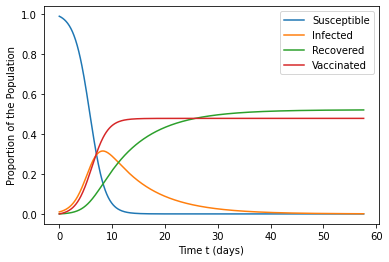

Stopping time: 57.62
Peak infected: 8.23 days, wtih proportion of population: 0.32


In [59]:
# SIRV Simulation 3

# Update the constants
tau = 0.8
kappa = 8

solVac3 = solve_ivp(odeVac, (0,100), (0.99, 0.01, 0, 0), method='RK45',max_step=0.1, events=[eventVac, peakInfectedVac]) 
plt.plot(solVac3.t, solVac3.y[0].T, label='Susceptible')
plt.plot(solVac3.t, solVac3.y[1].T, label='Infected')
plt.plot(solVac3.t, solVac3.y[2].T, label='Recovered')
plt.plot(solVac3.t, solVac3.y[3].T, label='Vaccinated')
plt.xlabel('Time t (days)')
plt.ylabel('Proportion of the Population')
plt.legend()
plt.show()

stop = solVac3.t_events[0]
peak = solVac3.t_events[1]
yPeak = solVac3.y_events[1][0][1]

print('Stopping time: ' + '{:.2f}'.format(float(stop)))
print('Peak infected: ' + '{:.2f}'.format(float(peak)) + ' days, wtih proportion of population: ' + '{:.2f}'.format(float(yPeak)))